<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_8_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_2.8_n20.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.205540,21.447524,89.649796,9502.767248,9693.070108,-3027.380875,12720.450983
1,0.0,1.0,55.261855,21.438324,51.602165,-5631.129352,-5492.827008,-30532.682057,25039.855049
2,0.0,2.0,98.909239,73.161929,40.150657,-60730.322353,-60508.100528,-19524.283773,-40983.816755
3,0.0,3.0,34.046716,74.120775,64.194833,165045.476661,165227.838985,56663.958440,108563.880545
4,0.0,4.0,21.359952,56.670333,63.779915,47523.800624,47675.610824,47030.394034,645.216790
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,93.115569,46.251200,70.762881,25750.127472,25970.257122,576.059563,25394.197559
19996,999.0,16.0,98.579396,71.903493,25.313343,-2782.263885,-2576.467653,-88941.651840,86365.184187
19997,999.0,17.0,44.986209,91.597312,25.078083,-249834.743645,-249663.082041,-92591.434742,-157071.647298
19998,999.0,18.0,65.925309,66.562412,70.139191,56615.968715,56828.595627,-13952.283044,70780.878672


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.205540,21.447524,89.649796,9502.767248,9693.070108,-3027.380875,12720.450983
1,0.0,1.0,55.261855,21.438324,51.602165,-5631.129352,-5492.827008,-30532.682057,25039.855049
2,0.0,2.0,98.909239,73.161929,40.150657,-60730.322353,-60508.100528,-19524.283773,-40983.816755
3,0.0,3.0,34.046716,74.120775,64.194833,165045.476661,165227.838985,56663.958440,108563.880545
4,0.0,4.0,21.359952,56.670333,63.779915,47523.800624,47675.610824,47030.394034,645.216790
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,93.115569,46.251200,70.762881,25750.127472,25970.257122,576.059563,25394.197559
19996,999.0,16.0,98.579396,71.903493,25.313343,-2782.263885,-2576.467653,-88941.651840,86365.184187
19997,999.0,17.0,44.986209,91.597312,25.078083,-249834.743645,-249663.082041,-92591.434742,-157071.647298
19998,999.0,18.0,65.925309,66.562412,70.139191,56615.968715,56828.595627,-13952.283044,70780.878672


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    69.205540  21.447524  ...  -3027.380875   12720.450983
      1.0    55.261855  21.438324  ... -30532.682057   25039.855049
      2.0    98.909239  73.161929  ... -19524.283773  -40983.816755
      3.0    34.046716  74.120775  ...  56663.958440  108563.880545
      4.0    21.359952  56.670333  ...  47030.394034     645.216790
...                ...        ...  ...           ...            ...
999.0 15.0   93.115569  46.251200  ...    576.059563   25394.197559
      16.0   98.579396  71.903493  ... -88941.651840   86365.184187
      17.0   44.986209  91.597312  ... -92591.434742 -157071.647298
      18.0   65.925309  66.562412  ... -13952.283044   70780.878672
      19.0   88.616884  97.239668  ... -73684.278411  259800.708428

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    69.205540  21.447524  ...  -3027.380875   12720.450983
      1.0    55.261855  21.438324  ... -30532.682057   25039.855049
      2.0    98.909239  73.161929  ... -19524.283773  -40983.816755
      3.0    34.046716  74.120775  ...  56663.958440  108563.880545
      4.0    21.359952  56.670333  ...  47030.394034     645.216790
...                ...        ...  ...           ...            ...
999.0 15.0   93.115569  46.251200  ...    576.059563   25394.197559
      16.0   98.579396  71.903493  ... -88941.651840   86365.184187
      17.0   44.986209  91.597312  ... -92591.434742 -157071.647298
      18.0   65.925309  66.562412  ... -13952.283044   70780.878672
      19.0   88.616884  97.239668  ... -73684.278411  259800.708428

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.205540,21.447524,89.649796,9502.767248,9693.070108,-3027.380875,12720.450983
1,0.0,1.0,55.261855,21.438324,51.602165,-5631.129352,-5492.827008,-30532.682057,25039.855049
2,0.0,2.0,98.909239,73.161929,40.150657,-60730.322353,-60508.100528,-19524.283773,-40983.816755
3,0.0,3.0,34.046716,74.120775,64.194833,165045.476661,165227.838985,56663.958440,108563.880545
4,0.0,4.0,21.359952,56.670333,63.779915,47523.800624,47675.610824,47030.394034,645.216790
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,93.115569,46.251200,70.762881,25750.127472,25970.257122,576.059563,25394.197559
19996,999.0,16.0,98.579396,71.903493,25.313343,-2782.263885,-2576.467653,-88941.651840,86365.184187
19997,999.0,17.0,44.986209,91.597312,25.078083,-249834.743645,-249663.082041,-92591.434742,-157071.647298
19998,999.0,18.0,65.925309,66.562412,70.139191,56615.968715,56828.595627,-13952.283044,70780.878672


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    69.205540  21.447524  ...  -3027.380875   12720.450983
      1.0    55.261855  21.438324  ... -30532.682057   25039.855049
      2.0    98.909239  73.161929  ... -19524.283773  -40983.816755
      3.0    34.046716  74.120775  ...  56663.958440  108563.880545
      4.0    21.359952  56.670333  ...  47030.394034     645.216790
...                ...        ...  ...           ...            ...
999.0 15.0   93.115569  46.251200  ...    576.059563   25394.197559
      16.0   98.579396  71.903493  ... -88941.651840   86365.184187
      17.0   44.986209  91.597312  ... -92591.434742 -157071.647298
      18.0   65.925309  66.562412  ... -13952.283044   70780.878672
      19.0   88.616884  97.239668  ... -73684.278411  259800.708428

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

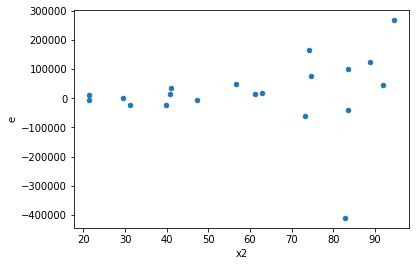

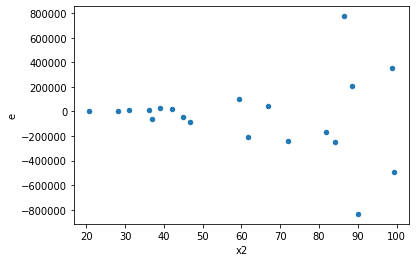

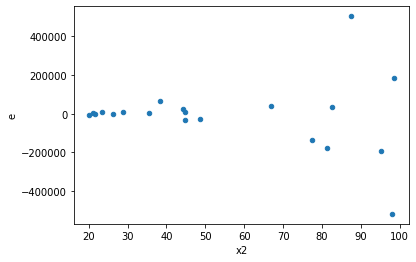

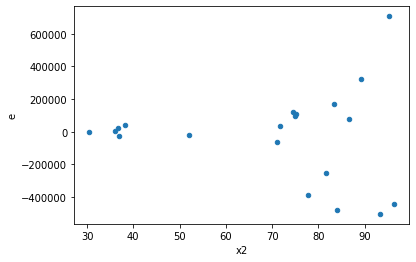

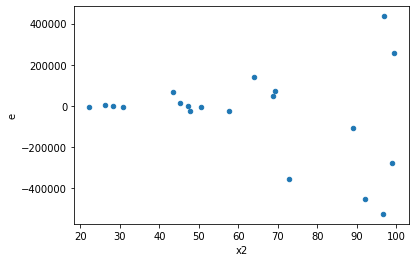

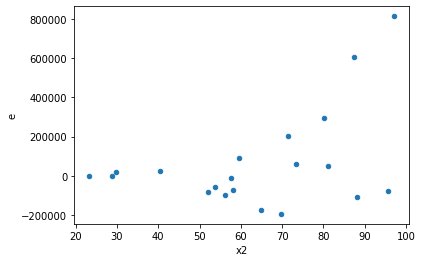

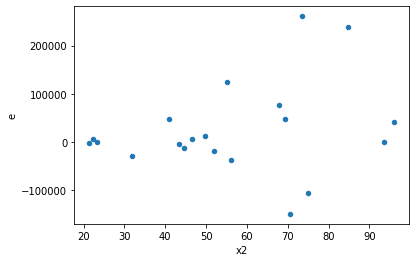

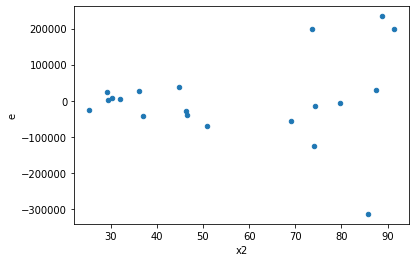

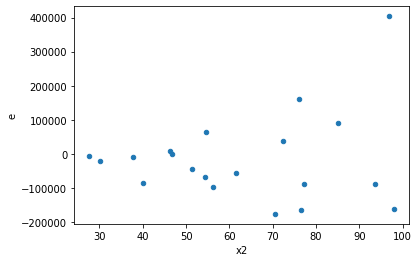

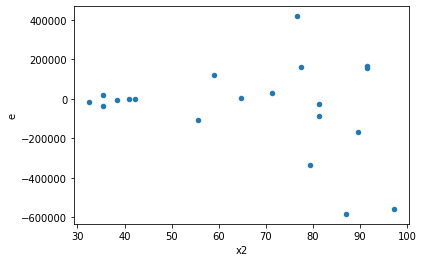

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,255131728543.9504,1306869749.469463,63782932135.9876,326717437.3673658,195.22353214428884,2.0034366718046925e-05,0.999989982816641,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,1767461131520.2625,5742349278.338833,441865282880.0656,1435587319.5847082,307.79408319647877,6.461715850836214e-06,0.9999967691420746,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,564359277553.4807,708208369.1681604,141089819388.37018,177052092.2920401,796.8830956013123,6.033887827161521e-07,0.9999996983056086,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,965326916661.1399,6391167389.759817,241331729165.28497,1597791847.4399543,151.0407814083895,3.784959549446576e-05,0.9999810752022528,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,799101660878.0327,2502934874.117635,199775415219.50818,625733718.5294087,319.26586230484395,5.8992629250465e-06,0.9999970503685375,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,648990961980.8046,6869527459.376156,162247740495.20114,1717381864.844039,94.47388715143757,0.00012062187358918841,0.9999396890632054,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,62555217590.529755,2430886361.0681453,15638804397.632439,607721590.2670363,25.733501406064345,0.002823304070234567,0.9985883479648827,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,160312886200.7623,4322153667.88146,40078221550.190575,1080538416.970365,37.090973278453795,0.0011793617799145117,0.9994103191100427,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,227509384829.3357,6901899305.953664,56877346207.33392,1725474826.488416,32.96330107758647,0.0015655397814642313,0.9992172301092679,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,255131728543.9504,1306869749.469463,63782932135.9876,326717437.3673658,195.22353214428884,2.0034366718046925e-05,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,1767461131520.2625,5742349278.338833,441865282880.0656,1435587319.5847082,307.79408319647877,6.461715850836214e-06,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,564359277553.4807,708208369.1681604,141089819388.37018,177052092.2920401,796.8830956013123,6.033887827161521e-07,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,965326916661.1399,6391167389.759817,241331729165.28497,1597791847.4399543,151.0407814083895,3.784959549446576e-05,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,799101660878.0327,2502934874.117635,199775415219.50818,625733718.5294087,319.26586230484395,5.8992629250465e-06,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,648990961980.8046,6869527459.376156,162247740495.20114,1717381864.844039,94.47388715143757,0.00012062187358918841,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,62555217590.529755,2430886361.0681453,15638804397.632439,607721590.2670363,25.733501406064345,0.002823304070234567,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,160312886200.7623,4322153667.88146,40078221550.190575,1080538416.970365,37.090973278453795,0.0011793617799145117,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,227509384829.3357,6901899305.953664,56877346207.33392,1725474826.488416,32.96330107758647,0.0015655397814642313,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    935
Reject005=1 : Homoscedasticity       65
Name: Result_test, dtype: int64